# Scenario generation based on stratified filter

We used random data to generate 5 years data for winter, spring, summer, and fall.

In [1]:
#Import packages
import random
import numpy as np
import pandas as pd
from random import seed
import matplotlib.pyplot as plt
from random import randint
import csv
from scipy.stats import wasserstein_distance
from sklearn.cluster import KMeans

In [2]:
#Generating data
winter = pd.DataFrame(np.random.uniform(0, 1, size=(10800,1)), columns=list('l'))
spring = pd.DataFrame(np.random.uniform(0, 1, size=(11040,1)), columns=list('l'))
summer = pd.DataFrame(np.random.uniform(0, 1, size=(11040,1)), columns=list('l'))
fall = pd.DataFrame(np.random.uniform(0, 1, size=(10920,1)), columns=list('l'))

Before calculating W.D, we need to define subsets with one week lenght.

In [3]:
def subset(season):
    samples = []
    for s in range(len(season)):
        end = s + 168
        sample = season.iloc[s:end]
        if len(sample) == 168:    
            samples.append(sample)
    return samples

Now the algorithm calculates Wasserstein distances (W.D) between each subset (one week) and corresponding season.

In [4]:
def wasserstein (season):    
    #for season in seasons:    
    wasserstein = []
    for item in subset(season):
        i = item.squeeze()
        ws = wasserstein_distance(season.squeeze(), i)
        wasserstein.append(ws)
    return wasserstein

Because it is normal to use 2D data for K-means algorithm, so we need to calculate the average of each subset.

In [5]:
def expectation (season):    
    expect = []
    for item in subset(season):
        i = item.squeeze()
        a = i.sum()/168
        expect.append(a)
    return expect

We need to build a dataframe includes columns oft average and W.D. Then we can use the dataframe as input in K-means algorithem. 

In [6]:
wasserstein_wi = wasserstein(winter)
average_wi = expectation(winter)
km_wi = pd.DataFrame(wasserstein_wi, columns=["WA"])
km_wi["mean"] = average_wi

wasserstein_sp = wasserstein(spring)
average_sp = expectation(spring)
km_sp = pd.DataFrame(wasserstein_sp, columns=["WA"])
km_sp["mean"] = average_sp

wasserstein_su = wasserstein(summer)
average_su = expectation(summer)
km_su = pd.DataFrame(wasserstein_su, columns=["WA"])
km_su["mean"] = average_su

wasserstein_fa = wasserstein(fall)
average_fa = expectation(fall)
km_fa = pd.DataFrame(wasserstein_fa, columns=["WA"])
km_fa["mean"] = average_fa

Now we use K-means algorithm to build three or any other number of clusters. The next cell uses the algorithem to make three clusters out of winter data.

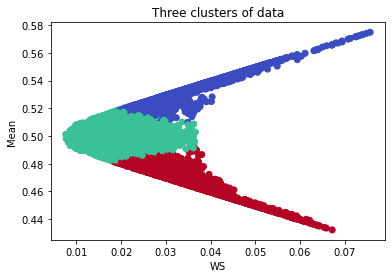

In [10]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=30)
kmeans.fit(km_wi)
P_wi = kmeans.predict(km_wi)

colors = list(map(lambda x: '#3b4cc0' if x == 1  else ('#b40426' if x==2 else "#3bc098") , P_wi))
plt.scatter(km_wi["WA"], km_wi["mean"], c=colors, marker="o", picker=True)
plt.title('Three clusters of data')
plt.xlabel('WS')
plt.ylabel('Mean')
plt.show()

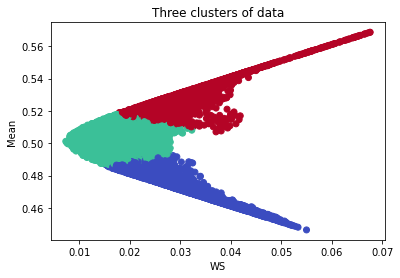

In [12]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=30)
kmeans.fit(km_su)
P_su = kmeans.predict(km_su)

colors = list(map(lambda x: '#3b4cc0' if x == 1  else ('#b40426' if x==2 else "#3bc098") , P_su))
plt.scatter(km_su["WA"], km_su["mean"], c=colors, marker="o", picker=True)
plt.title('Three clusters of data')
plt.xlabel('WS')
plt.ylabel('Mean')
plt.show()

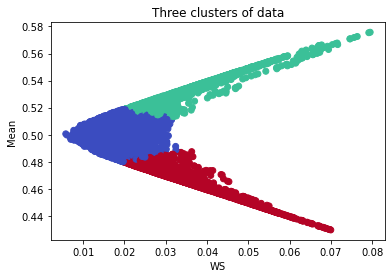

In [13]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=30)
kmeans.fit(km_sp)
P_sp = kmeans.predict(km_sp)

colors = list(map(lambda x: '#3b4cc0' if x == 1  else ('#b40426' if x==2 else "#3bc098") , P_sp))
plt.scatter(km_sp["WA"], km_sp["mean"], c=colors, marker="o", picker=True)
plt.title('Three clusters of data')
plt.xlabel('WS')
plt.ylabel('Mean')
plt.show()

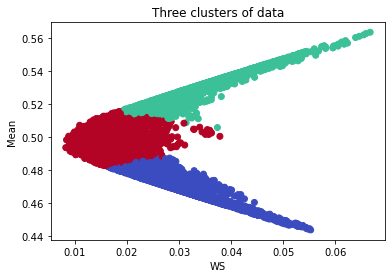

In [14]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=30)
kmeans.fit(km_fa)
P_fa = kmeans.predict(km_fa)

colors = list(map(lambda x: '#3b4cc0' if x == 1  else ('#b40426' if x==2 else "#3bc098") , P_fa))
plt.scatter(km_fa["WA"], km_fa["mean"], c=colors, marker="o", picker=True)
plt.title('Three clusters of data')
plt.xlabel('WS')
plt.ylabel('Mean')
plt.show()